In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
data=pd.read_csv("train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#considering 'Survived','Pclass','Sex','Age','Fare','Embarked' for analysis
data1=data[['Survived','Pclass','Sex','Age','Fare','Embarked']]
data1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [3]:
#checking the no. of missing values for each column
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [4]:
#imputing missing value in age column
data1.Age.fillna(data1.Age.mean(),inplace=True)
data1.isnull().sum()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [5]:
#imputing missing value in embarked column
data1.Embarked.fillna(data1.Embarked.value_counts().idxmax(),inplace=True)
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [6]:
#converting the pclass column to be of type string since it is categorical
data1.Pclass=data1.Pclass.apply(str)

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
#checking effect of embarked on survived
data1.groupby(["Embarked","Survived"]).agg({'Survived':'count'})

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              219

In [8]:
target=data1.pop("Survived")

In [9]:
#creating family size which is sum of sibsp and parch
data1["family_size"]=data['SibSp']+data['Parch']
data1.head()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [10]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
data1["Embarked"]=le.fit_transform(data1["Embarked"])
data1.head()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,2,1
1,1,female,38.0,71.2833,0,1
2,3,female,26.0,7.9250,2,0
3,1,female,35.0,53.1000,2,1
4,3,male,35.0,8.0500,2,0


In [11]:
#performing label encoding for categorical variables
data1["Sex"]=le.fit_transform(data1["Sex"])
data1["Pclass"]=le.fit_transform(data1["Pclass"])
data1.head()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,Fare,Embarked,family_size
0,2,1,22.0,7.2500,2,1
1,0,0,38.0,71.2833,0,1
2,2,0,26.0,7.9250,2,0
3,0,0,35.0,53.1000,2,1
4,2,1,35.0,8.0500,2,0


In [12]:
#creating training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data1, target, test_size=0.1)

In [13]:
#creating a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
y_pred = dt.predict(x_test)
y_pred1 = dt.predict(x_train)

In [15]:
#checking model accuray using AUC-ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7227247032221593

In [16]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9803789346881056

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

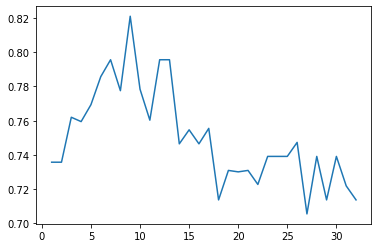

In [18]:
#checking effect of max_depth on model accuracy
max_depths=np.linspace(1,32,32)
acc_md=[]
for md in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=md)
    dt_temp.fit(x_train, y_train)
    y_pred_temp = dt_temp.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_temp)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    acc_md.append(roc_auc)
plt.plot(max_depths,acc_md)

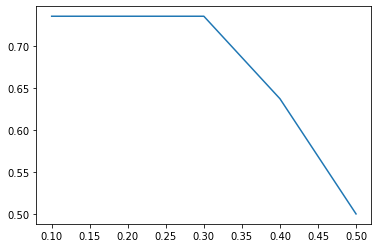

In [19]:
#checking effect of min_samples_leaf on model accuracy
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line2 = plt.plot(min_samples_leafs, test_results)
plt.show()

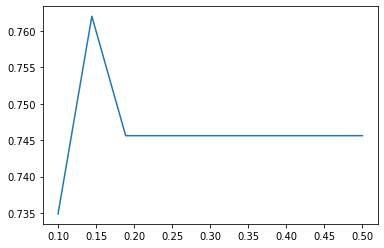

In [20]:
#checking effect of min_samples_split on model accuracy
min_samples_split = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for x in min_samples_split:
   dt = DecisionTreeClassifier(min_samples_split=x)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(min_samples_leafs, train_results, ‘b’, label=”Train AUC”)
line2 = plt.plot(min_samples_split, test_results)
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel(‘AUC score’)
#plt.xlabel(‘min samples leaf’)
plt.show()

In [21]:
dt_final = DecisionTreeClassifier(max_depth=7)
dt_final.fit(x_train, y_train)
y_pred_final=dt_final.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_final)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7685132843414357

In [22]:
y_pred_train=dt_final.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8535196145184099

In [23]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test_data1=test_data[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]
test_data1.Age.fillna(test_data1.Age.mean(),inplace=True)
test_data1.Embarked.fillna(test_data1.Embarked.value_counts().idxmax(),inplace=True)
test_data1.Fare.fillna(test_data1.Fare.mean(),inplace=True)
test_data1.isnull().sum()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
SibSp       0
Parch       0
dtype: int64

In [25]:
test_data1.Pclass=test_data1.Pclass.apply(str)

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
test_data1["Sex"]=le.fit_transform(test_data1["Sex"])
test_data1["Pclass"]=le.fit_transform(test_data1["Pclass"])
test_data1["Embarked"]=le.fit_transform(test_data1["Embarked"])

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [27]:
test_data1["family_size"]=test_data1["Parch"]+test_data1["SibSp"]
test_data1.pop("SibSp")
test_data1.pop("Parch")
test_data1.head()

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Fare,Embarked,family_size
0,2,1,34.5,7.8292,1,0
1,2,0,47.0,7.0000,2,1
2,1,1,62.0,9.6875,1,0
3,2,1,27.0,8.6625,2,0
4,2,0,22.0,12.2875,2,2


In [28]:
test=test_data1

In [29]:
y=dt_final.predict(test)

In [30]:
i=892
with open("predictions_dt_v2.txt","w") as file:
    file.write("PassengerId,Survived\n")
    for yi in y :
        file.write(str(i)+","+str(yi))
        file.write("\n")
        i=i+1

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred=rfc.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7882984737139627

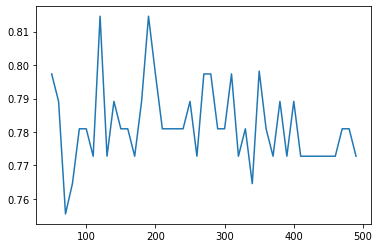

In [34]:
#checking effect of n_estimators on model accuracy
n_estimators=range(50,500,10)
acc_est=[]
for e in n_estimators:
    #print(e)
    rfc_temp = RandomForestClassifier(n_estimators=e)
    rfc_temp.fit(x_train, y_train)
    y_pred_temp = rfc_temp.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_temp)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    acc_est.append(roc_auc)
plt.plot(n_estimators,acc_est)

/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shubhamgangil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shubh

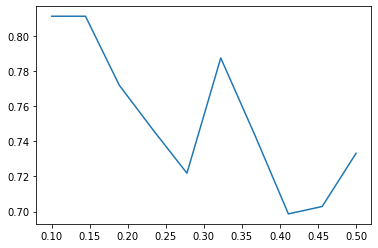

In [35]:
#checking effect of min_samples_split on model accuracy
min_samples_split = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for x in min_samples_split:
   rfc_temp = RandomForestClassifier(min_samples_split=x)
   rfc_temp.fit(x_train, y_train)
   train_pred = rfc_temp.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rfc_temp.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(min_samples_leafs, train_results, ‘b’, label=”Train AUC”)
line2 = plt.plot(min_samples_split, test_results)
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel(‘AUC score’)
#plt.xlabel(‘min samples leaf’)
plt.show()

In [37]:
#performing a grid search cv to select the best combination of hyper parameters
from sklearn.model_selection import cross_val_score,GridSearchCV
rfc2=RandomForestClassifier()
parameters={'n_estimators':[x for x in range(100,130,5)],'max_depth':[x for x in range(5,15)],'min_samples_split':np.linspace(0.3,0.4,10)}
rfc2=GridSearchCV(rfc2,parameters,scoring='roc_auc',cv=5)
rfc2.fit(data1,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [61]:
print(rfc2.best_score_)
print(rfc2.best_params_)

0.8516999443975509
{'max_depth': 10, 'min_samples_split': 0.3, 'n_estimators': 125}


In [62]:
y_pred_train=rfc2.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
y_pred=rfc2.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.7732917409387998
0.7546296296296295


In [83]:
rfc3=RandomForestClassifier()
parameters={'n_estimators':[x for x in range(100,130,5)],'max_depth':[x for x in range(5,15)]}
rfc3=GridSearchCV(rfc3,parameters,scoring='roc_auc',cv=5)
rfc3.fit(data1,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [85]:
rfc3.best_score_
rfc3.best_params_

{'max_depth': 7, 'n_estimators': 125}

In [86]:
y_rfc=rfc3.predict(test)

In [87]:
i=892
with open("predictions_rfc_v2.txt","w") as file:
    file.write("PassengerId,Survived\n")
    for yi in y_rfc :
        file.write(str(i)+","+str(yi))
        file.write("\n")
        i=i+1

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7731481481481481

In [53]:
xgb1=XGBClassifier(n_estimators=50)
xgb1.fit(x_train,y_train)
y_pred=xgb1.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8231566820276498

In [54]:
y_pred=xgb1.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8303077466354517

In [77]:
#creating Gradient boosting classifier based on grid search
xgb2=XGBClassifier()
parameters={'n_estimators':[x for x in range(100,200,5)],'learning_rate':np.linspace(0.2,0.4,10),'max_depth':[x for x in range(5,10)]} 
xgb2=GridSearchCV(xgb2,parameters,scoring='roc_auc',cv=2)
xgb2.fit(data1,target)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.2       , 0.22222222, 0.24444444, 0.26666667, 0.28888889,
       0.31111111, 0.33333333, 0.35555556, 0.37777778, 0.4       ]),
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 105, 110, 115, 120, 125, 130,
       

In [78]:
print(xgb2.best_score_)
print(xgb2.best_params_)

0.8306826802705813
{'learning_rate': 0.33333333333333337, 'max_depth': 5, 'n_estimators': 105}


In [79]:
y_pred_train=xgb2.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
y_pred=xgb2.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9486631016042779
0.9722222222222222


In [64]:
xgb3=XGBClassifier()
parameters={'n_estimators':[x for x in range(100,150,5)],'learning_rate':np.linspace(0.8,1,10),'max_depth':[x for x in range(1,5)]} 
xgb3=GridSearchCV(xgb3,parameters,scoring='roc_auc',cv=4)
xgb3.fit(train,target)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.8       , 0.82222222, 0.84444444, 0.86666667, 0.88888889,
       0.91111111, 0.93333333, 0.95555556, 0.97777778, 1.      

In [67]:
xgb3.best_score_
xgb3.best_params_

{'learning_rate': 0.8, 'max_depth': 2, 'n_estimators': 85}

In [80]:
y_xgb=xgb2.predict(test)

In [81]:
i=892
with open("predictions_xgb_v2.txt","w") as file:
    file.write("PassengerId,Survived")
    file.write("\n")
    for yi in y_xgb :
        file.write(str(i)+","+str(yi))
        file.write("\n")
        i=i+1

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb1=GradientBoostingClassifier()
gb1.fit(x_train,y_train)
y_pred=gb1.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7793778801843319

In [137]:
gb1=GradientBoostingClassifier(n_estimators=200,min_samples_split=0.45,max_depth=7)
gb1.fit(x_train,y_train)
y_pred=gb1.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8488016318204998

In [138]:
y_pred_train=gb1.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9020359598096246

In [139]:
y_gb=gb1.predict(test)

In [140]:
i=892
with open("predictions_gb.txt","w") as file:
    file.write("PassengerId,Survived")
    file.write("\n")
    for yi in y_gb :
        file.write(str(i)+","+str(yi))
        file.write("\n")
        i=i+1

In [72]:
from sklearn.ensemble import VotingClassifier

In [73]:
vc1=VotingClassifier(estimators=[('dt', dt_final), ('rf', rfc2), ('xgb', xgb1)], voting='hard')
vc1.fit(x_train,y_train)
y_pred=vc1.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8006912442396313

In [74]:
y_pred_train=vc1.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8138806419126591

In [75]:
y_vc=vc1.predict(test)
i=892
with open("predictions_vc.txt","w") as file:
    file.write("PassengerId,Survived")
    file.write("\n")
    for yi in y_vc :
        file.write(str(i)+","+str(yi))
        file.write("\n")
        i=i+1